# Create a variable and Print Hello in Python

message =  'Hello Finance And Technology Explained'
print(message)


In [3]:
# Create a collection to store a list of integers in Python

myList = [3,6,9,12]
print(myList)
len(myList)

[3, 6, 9, 12]


4

In [7]:
#How to create a function in Python
def MyFunction(mandatoryInput, optionalInput="Some Default Value"):
    print("Mandatory Input:"+mandatoryInput)
    print("Optional Input:"+optionalInput)
    return mandatoryInput + "--" + optionalInput

#Call the new function
result = MyFunction("Hello Function Argument 1")
print(result)
result = MyFunction("Hello Function Argument 1", "Hello Function Argument 2")
print(result)

Mandatory Input:Hello Function Argument 1
Optional Input:Some Default Value
Hello Function Argument 1--Some Default Value
Mandatory Input:Hello Function Argument 1
Optional Input:Hello Function Argument 2
Hello Function Argument 1--Hello Function Argument 2


In [9]:
#Implement a for loop in Python
for myVariable in range(1,5):
    print(2 * myVariable)

2
4
6
8


In [10]:
# Implement a if then else condition in Python
message = "We Are Ready To Start"
if ("We Are Ready To Start" == message):
    print("Let's start looking into Python Packages")
    
message = 10
if (12 > message):
    print("Let's start looking into Python Packages")

Let's start looking into Python Packages
Let's start looking into Python Packages


In [46]:
#import pandas
import pandas as pa
import matplotlib as plot

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

#read time series from the exchange.csv file 
exchangeRatesSeries = GetData('exchange.csv')

#view top 10 records
exchangeRatesSeries.head(10)

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96
1999-01-07,83.12
1999-01-08,82.37
1999-01-11,77.03
1999-01-12,83.44


In [21]:
#view basic stats information on data
exchangeRatesSeries.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


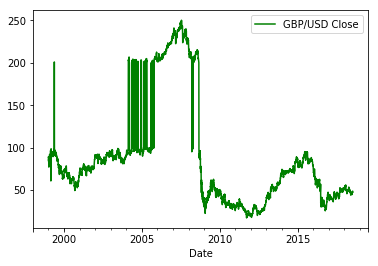

In [22]:
#plot the time series data
exchangeRatesSeries.plot(color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000050DA8C2080>]],
      dtype=object)

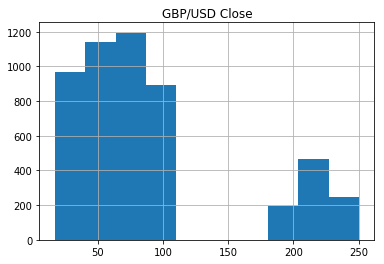

In [59]:
exchangeRatesSeries.hist()

In [105]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction

#creating data
ExchangeRates = [[1],[1.5],[2],[4],[6],[8],[16],[1]]

#predict next value
predicted = StartARIMAForecasting(ExchangeRates, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))


Predicted=15.219305


In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import MeanSquaredError

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

#Print MSE to see how good the model is
Error = MeanSquaredError(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()

Actual=25.703000, Predicted=24.576407
Actual=25.211000, Predicted=25.332257
Actual=25.110000, Predicted=25.111075
Actual=24.872000, Predicted=25.226216
Actual=25.363000, Predicted=24.936624
Actual=25.170000, Predicted=25.239772
Actual=27.179000, Predicted=25.092933
Actual=27.836000, Predicted=26.591637
Actual=27.985000, Predicted=27.171861
Actual=27.105000, Predicted=27.780563
Actual=26.920000, Predicted=27.315171
Actual=26.985000, Predicted=27.143033
Actual=26.249000, Predicted=26.975665
Actual=25.962000, Predicted=26.429684
Actual=25.566000, Predicted=26.183522
Actual=25.989000, Predicted=25.718159
Actual=25.758000, Predicted=25.920294
Actual=25.783000, Predicted=25.706840
Actual=26.084000, Predicted=25.801640
Actual=26.210000, Predicted=25.960352
Actual=27.010000, Predicted=26.080079
Actual=26.853000, Predicted=26.716710
Actual=25.614000, Predicted=26.700089
Actual=25.077000, Predicted=25.999553
Actual=25.090000, Predicted=25.482576
Actual=25.618000, Predicted=25.170893
Actual=25.98

C:\Users\farhadm\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=51.895000, Predicted=52.741261
Actual=51.806000, Predicted=51.992721
Actual=51.450000, Predicted=52.114335
Actual=51.359000, Predicted=51.555345
Actual=52.150000, Predicted=51.448851
Actual=54.106000, Predicted=51.915092
Actual=54.432000, Predicted=53.329267
Actual=53.257000, Predicted=53.896438
Actual=53.730000, Predicted=53.535344
Actual=55.394000, Predicted=53.831859
Actual=56.030000, Predicted=54.770009
Actual=55.818000, Predicted=55.463911
Actual=55.720000, Predicted=55.737943
Actual=55.760000, Predicted=55.785841
Actual=56.194000, Predicted=55.755195
Actual=56.599000, Predicted=56.041012
Actual=56.180000, Predicted=56.369488
Actual=55.320000, Predicted=56.206955
Actual=54.580000, Predicted=55.659481
Actual=53.867000, Predicted=54.975358
Actual=52.896000, Predicted=54.225544
Actual=52.646000, Predicted=53.326599
Actual=53.760000, Predicted=52.915703
Actual=52.970000, Predicted=53.460207
Actual=53.389000, Predicted=52.949201
Actual=52.650000, Predicted=53.426783
Actual=52.38

Actual=70.220000, Predicted=70.623381
Actual=70.607000, Predicted=70.345328
Actual=70.289000, Predicted=70.589952
Actual=70.451000, Predicted=70.290973
Actual=68.831000, Predicted=70.466771
Actual=70.473000, Predicted=69.274632
Actual=71.017000, Predicted=70.326231
Actual=72.467000, Predicted=70.479791
Actual=72.707000, Predicted=71.913445
Actual=71.782000, Predicted=72.314703
Actual=71.110000, Predicted=72.009119
Actual=70.592000, Predicted=71.509148
Actual=68.837000, Predicted=70.883519
Actual=68.526000, Predicted=69.468086
Actual=69.190000, Predicted=68.992947
Actual=68.210000, Predicted=69.041932
Actual=69.456000, Predicted=68.350976
Actual=68.949000, Predicted=69.290849
Actual=68.414000, Predicted=68.817329
Actual=68.731000, Predicted=68.684531
Actual=69.070000, Predicted=68.742410
Actual=69.284000, Predicted=68.888669
Actual=69.670000, Predicted=69.139831
Actual=71.070000, Predicted=69.501579
Actual=72.097000, Predicted=70.558470
Actual=72.450000, Predicted=71.477591
Actual=72.51

Actual=87.399000, Predicted=87.140994
Actual=87.080000, Predicted=87.262787
Actual=87.257000, Predicted=87.140668
Actual=87.240000, Predicted=87.273851
Actual=85.917000, Predicted=87.204506
Actual=86.670000, Predicted=86.319048
Actual=86.430000, Predicted=86.731475
Actual=84.700000, Predicted=86.330530
Actual=82.553000, Predicted=85.275725
Actual=79.850000, Predicted=83.573722
Actual=79.966000, Predicted=81.120497
Actual=80.510000, Predicted=80.507200
Actual=79.746000, Predicted=80.304431
Actual=79.450000, Predicted=79.854736
Actual=78.638000, Predicted=79.705433
Actual=78.610000, Predicted=78.939670
Actual=76.727000, Predicted=78.790675
Actual=78.246000, Predicted=77.291608
Actual=77.799000, Predicted=78.196014
Actual=79.946000, Predicted=77.588674
Actual=78.306000, Predicted=79.401992
Actual=77.740000, Predicted=78.325196
Actual=76.608000, Predicted=78.275396
Actual=78.600000, Predicted=77.059788
Actual=79.040000, Predicted=78.241113
Actual=78.080000, Predicted=78.463728
Actual=78.31

Actual=85.953000, Predicted=85.559560
Actual=85.788000, Predicted=85.727932
Actual=84.173000, Predicted=85.796355
Actual=84.941000, Predicted=84.694322
Actual=85.494000, Predicted=85.060215
Actual=86.040000, Predicted=85.150932
Actual=86.176000, Predicted=85.758407
Actual=86.592000, Predicted=86.018177
Actual=86.990000, Predicted=86.439483
Actual=85.170000, Predicted=86.779861
Actual=85.400000, Predicted=85.631645
Actual=86.110000, Predicted=85.728783
Actual=86.240000, Predicted=85.836194
Actual=86.920000, Predicted=86.046572
Actual=86.688000, Predicted=86.690357
Actual=86.800000, Predicted=86.609620
Actual=87.345000, Predicted=86.819919
Actual=87.660000, Predicted=87.155168
Actual=88.215000, Predicted=87.446800
Actual=87.835000, Predicted=87.982204
Actual=86.640000, Predicted=87.829742
Actual=85.770000, Predicted=87.084560
Actual=84.778000, Predicted=86.289417
Actual=85.649000, Predicted=85.258675
Actual=85.010000, Predicted=85.598000
Actual=84.645000, Predicted=85.006008
Actual=85.29

Actual=31.670000, Predicted=30.955056
Actual=32.233000, Predicted=31.584441
Actual=32.866000, Predicted=31.888017
Actual=32.548000, Predicted=32.539348
Actual=33.670000, Predicted=32.490470
Actual=33.668000, Predicted=33.388145
Actual=34.717000, Predicted=33.404943
Actual=35.784000, Predicted=34.391320
Actual=37.005000, Predicted=35.218613
Actual=38.205000, Predicted=36.395632
Actual=37.600000, Predicted=37.568960
Actual=37.092000, Predicted=37.510523
Actual=35.701000, Predicted=37.365678
Actual=36.326000, Predicted=36.208150
Actual=36.335000, Predicted=36.421278
Actual=35.770000, Predicted=36.171828
Actual=35.454000, Predicted=35.923705
Actual=35.440000, Predicted=35.654406
Actual=35.289000, Predicted=35.492561
Actual=33.263000, Predicted=35.318281
Actual=32.703000, Predicted=33.885400
Actual=32.123000, Predicted=33.292538
Actual=30.815000, Predicted=32.389350
Actual=31.891000, Predicted=31.311564
Actual=31.047000, Predicted=31.831152
Actual=30.069000, Predicted=31.040324
Actual=30.56

Actual=40.767000, Predicted=41.877670
Actual=41.077000, Predicted=41.063468
Actual=41.197000, Predicted=41.245669
Actual=41.526000, Predicted=41.071959
Actual=42.307000, Predicted=41.388360
Actual=43.802000, Predicted=41.987657
Actual=45.104000, Predicted=43.172046
Actual=45.638000, Predicted=44.379681
Actual=46.400000, Predicted=45.189949
Actual=46.813000, Predicted=46.049658
Actual=46.390000, Predicted=46.513628
Actual=46.350000, Predicted=46.418165
Actual=46.800000, Predicted=46.443060
Actual=46.903000, Predicted=46.658498
Actual=46.855000, Predicted=46.761201
Actual=46.315000, Predicted=46.836547
Actual=45.785000, Predicted=46.474742
Actual=46.585000, Predicted=46.047641
Actual=47.391000, Predicted=46.444350
Actual=46.992000, Predicted=46.959904
Actual=46.089000, Predicted=46.928006
Actual=45.590000, Predicted=46.437633
Actual=45.279000, Predicted=45.920229
Actual=44.310000, Predicted=45.462228
Actual=44.825000, Predicted=44.651534
Actual=45.513000, Predicted=44.865888
Actual=45.71

Actual=52.340000, Predicted=52.907712
Actual=51.260000, Predicted=52.612756
Actual=50.700000, Predicted=51.684481
Actual=51.370000, Predicted=51.088128
Actual=51.800000, Predicted=51.273807
Actual=52.370000, Predicted=51.511602
Actual=52.250000, Predicted=52.098793
Actual=50.260000, Predicted=52.153755
Actual=50.280000, Predicted=50.874081
Actual=49.500000, Predicted=50.694153
Actual=49.030000, Predicted=49.706683
Actual=48.160000, Predicted=49.328577
Actual=47.770000, Predicted=48.506387
Actual=47.870000, Predicted=48.061048
Actual=47.520000, Predicted=47.907804
Actual=48.670000, Predicted=47.588784
Actual=47.830000, Predicted=48.390169
Actual=48.020000, Predicted=47.817882
Actual=48.810000, Predicted=48.139856
Actual=48.817000, Predicted=48.515575
Actual=49.398000, Predicted=48.632602
Actual=49.957000, Predicted=49.215185
Actual=49.181000, Predicted=49.651935
Actual=49.176000, Predicted=49.283655
Actual=48.812000, Predicted=49.337454
Actual=48.125000, Predicted=48.906041
Actual=46.44

<Figure size 640x480 with 1 Axes>